In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv('chiefs_data_clean2019.csv')
del[df['game_time']]

In [54]:
cap_pct = []

for index,row in df.iterrows() :
    if row['season'] in pd.Interval(left = 2005, right = 2009, closed = 'both') :
        cap_pct.append(row['attendance'] / 79451)
    else :
        cap_pct.append(row['attendance'] / 76416)

In [55]:
df['attendance'] = cap_pct

<AxesSubplot:>

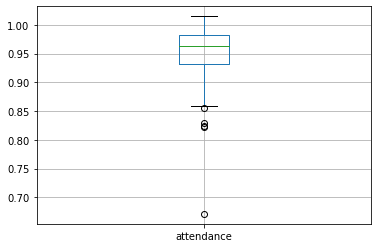

In [56]:
df.boxplot('attendance')

In [57]:
df = df[df['attendance'] > .7]

In [58]:


avg_attendance = pd.DataFrame(df['attendance'])
avg_attendance['avg'] = np.mean(df['attendance'])

np.sqrt(mean_squared_error(avg_attendance['attendance'], avg_attendance['avg']))

0.044899584240825595

In [59]:
div_opp = []

for index,row in df.iterrows() :
    if (row['opp_Broncos'] == 1) \
        or (row['opp_Raiders'] == 1) \
            or (row['opp_Chargers'] == 1):
            div_opp.append(1)
    else:
        div_opp.append(0)

In [60]:
df['Division_Opp'] = div_opp

pd.DataFrame(df.groupby('Division_Opp')['attendance'].mean()).reset_index()

,Division_Opp,attendance
0,0,0.947763
1,1,0.960608


<AxesSubplot:>

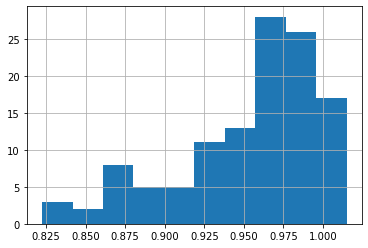

In [61]:
df['attendance'].hist()

In [62]:
df['loss_buck'] = [8 if x > 8 else x for x in df['losses']]

<AxesSubplot:xlabel='loss_log'>

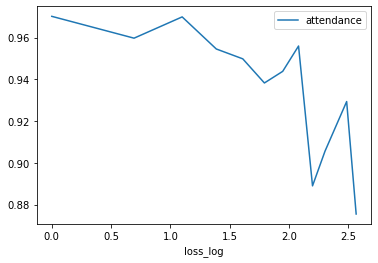

In [63]:
aa = []
for i in df['losses'] :
    if i == 0 :
        aa.append(0)
    else :
        aa.append(np.log(i))
df['loss_log'] = aa

losses = df.groupby('loss_log')['attendance'].mean().reset_index()
losses.plot('loss_log','attendance')

<AxesSubplot:xlabel='losses'>

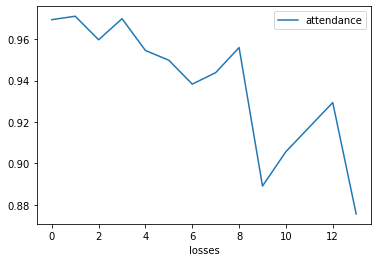

In [64]:
losses = df.groupby('losses')['attendance'].mean().reset_index()
losses.plot('losses','attendance')

<AxesSubplot:xlabel='loss_buck'>

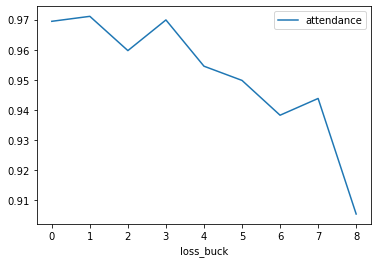

In [65]:
losses = df.groupby('loss_buck')['attendance'].mean().reset_index()
losses.plot('loss_buck','attendance')

<AxesSubplot:xlabel='wins'>

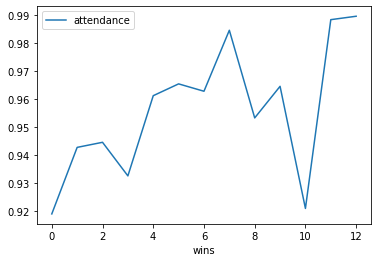

In [66]:
wins = df.groupby('wins')['attendance'].mean().reset_index()
wins.plot('wins','attendance')

<AxesSubplot:xlabel='win_ratio'>

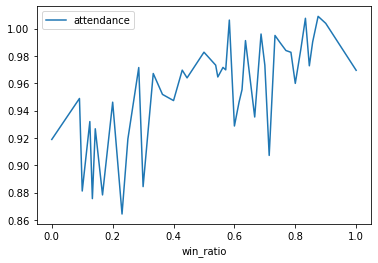

In [67]:
wins = df.groupby('win_ratio')['attendance'].mean().reset_index()
wins.plot('win_ratio','attendance')

<AxesSubplot:xlabel='season'>

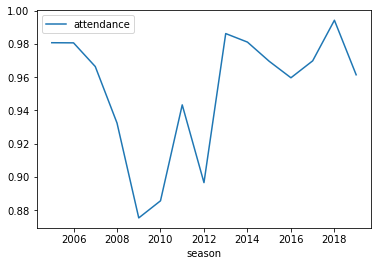

In [68]:
season = df.groupby('season')['attendance'].mean().reset_index()
season.plot('season','attendance')

In [69]:
df[['losses','attendance']].corr()

,losses,attendance
losses,1.000000,-0.430323
attendance,-0.430323,1.000000


In [70]:
new_data = df[['loss_buck','attendance']]

In [71]:
predictors = ['loss_log','season','exp_pts_off','gametime_1', 'Division_Opp']
'''for x in df.columns :
    if 'opp' in x :
        predictors.append(x)'''

"for x in df.columns :\n    if 'opp' in x :\n        predictors.append(x)"

In [72]:
predictors

['loss_log', 'season', 'exp_pts_off', 'gametime_1', 'Division_Opp']

In [73]:
target = ['attendance']

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 123
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))


In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)

lr_fit_predict = lr_fit.predict(x_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_fit_predict))
print("R Squared of Linear Regression:", r2_score(y_test, lr_fit_predict))
print("RMSE of Linear Regression", str(lr_rmse))

R Squared of Linear Regression: 0.23797737102260574
RMSE of Linear Regression 0.03471821314878042


In [77]:
.044 / 0.035 - 1 

0.2571428571428569

## Final Results and Thoughts
